In [42]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# For text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#import spacy
#from spacy.lang.en import English

#from nltk.corpus import wordnet as wn
#from nltk.stem.wordnet import WordNetLemmatizer

# Text - visualization
#from wordcloud import WordCloud, STOPWORDS 

# Importing Gensim
#import gensim
#from gensim import corpora
#from gensim import models
#from gensim.utils import simple_preprocess
#from gensim.models import CoherenceModel
#from gensim.models.phrases import Phrases, Phraser

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
#from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

In [43]:
# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: 
#    - an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, 
#    - an array y of integer values, size [n_samples], holding the class labels for the 
#      training samples:

In [44]:
location = r"E:\Python\Machine Learning\datasets\titanic-train.csv"

In [45]:
## import pandas as pd
# load the training data 
train = pd.read_csv(location)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train.shape

(891, 12)

In [47]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
#NAs[NAs.sum(axis =1) >0]

In [49]:
# Checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [50]:
# We will remove ‘Cabin’, ‘Name’ and ‘Ticket’ columns as they require some processing 
# to extract useful features

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# drop the Cabin feature since it is missing a lot of the data
train.pop('Cabin')
train.pop('Name')
train.pop('Ticket')

train.shape

(891, 9)

In [53]:
# Filling missing Age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [54]:
train['Embarked'].mode()[0]

'S'

In [55]:
# Filling missing Embarked values with most common value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [56]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [57]:
train['Embarked'].unique()[0]


'S'

In [58]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [59]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [60]:
train['Pclass'] =train['Pclass'].astype("str")

In [61]:
# ‘Pclass’ is a categorical feature so we convert its values to strings

train['Pclass'] = train['Pclass'].apply(str)

In [62]:
# # Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [63]:
train.columns[train.dtypes =='object']

Index([], dtype='object')

In [64]:
pd.get_dummies(train,columns=train.columns[train.dtypes =='object'])

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,888,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,889,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,890,1,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


In [65]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [66]:
# Prepare data for training models
labels = train.pop('Survived')

In [67]:
# For testing, we choose to split our data to 75% train and 25% for test
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [68]:
# Instantiate dec tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [69]:
# train the classifier 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [70]:
# predict
y_pred = dt.predict(x_test)

In [71]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [72]:
metrics.accuracy_score(y_test,y_pred)

0.7174887892376681

In [73]:
dt.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [74]:
# We will use AUC (Area Under Curve) as the evaluation metric. 
# Our target value is binary so it’s a binary classification problem. 
# AUC is a good way for evaluation for this type of problems.

In [75]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [76]:
thresholds

array([2, 1, 0], dtype=int64)

In [77]:
print(type(true_positive_rate))
print(true_positive_rate)

<class 'numpy.ndarray'>
[0.         0.73972603 1.        ]


In [78]:
false_positive_rate

array([0.        , 0.29333333, 1.        ])

In [79]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7231963470319633

In [80]:
# max_depth

In [81]:
# This indicates how deep the tree can be. The deeper the tree, the more splits it has and 
# it captures more information about the data. We fit a decision tree with depths ranging from 
# 1 to 32 

In [82]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
max_depths

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [83]:
train_results = []
test_results = []

In [84]:
for max_depth in max_depths:
    #print(max_depth)
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    dt.fit(x_train, y_train)
    
    train_pred = dt.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous test results
    test_results.append(roc_auc)

In [85]:
max_depths.shape

(32,)

In [86]:
len(train_results),  len(test_results)

(32, 32)

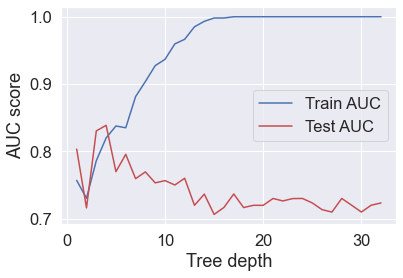

In [87]:
#  model overfits for large depth values. The tree perfectly predicts all of the train data, 
# however, it fails to generalize the findings for new data

#from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(max_depths, test_results,  'r', label= 'Test AUC')

plt.legend()
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=3)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')

plt.show()

In [65]:
# min_samples_split

In [66]:
# min_samples_split represents the minimum number of samples required to split an internal node. 

# This can vary between considering at least one sample at each node to considering all of the 
# samples at each node. When we increase this parameter, the tree becomes more constrained as it 
# has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of 
# the samples

In [67]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

In [69]:
min_samples_splits

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [70]:
train_results = []
test_results = []

In [71]:
for min_samples_split in min_samples_splits:
    
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    
    train_pred = dt.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    train_results.append(roc_auc)
    
    y_pred = dt.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    test_results.append(roc_auc)

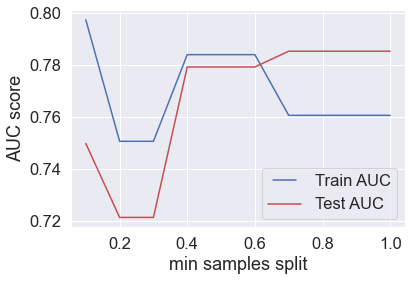

In [72]:
# when we consider 100% of the samples at each node, the model cannot learn enough about 
# the data. This is an underfitting case.

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label=  'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [ ]:
# max_features

In [ ]:
# max_features represents the number of features to consider when looking for the best split.

In [73]:
max_features = list(range(1, train.shape[1]))

In [74]:
train_results = []
test_results = []

In [75]:
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    train_results.append(roc_auc)
    
    y_pred = dt.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    test_results.append(roc_auc)

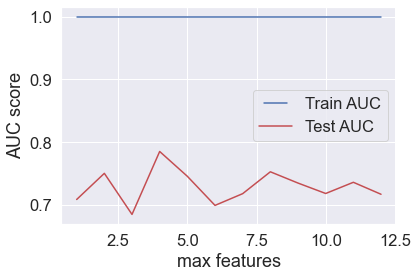

In [76]:
# This is also an overfitting case.
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results,  'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

### heading